In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from kubernetes import client, config
import requests
import datetime

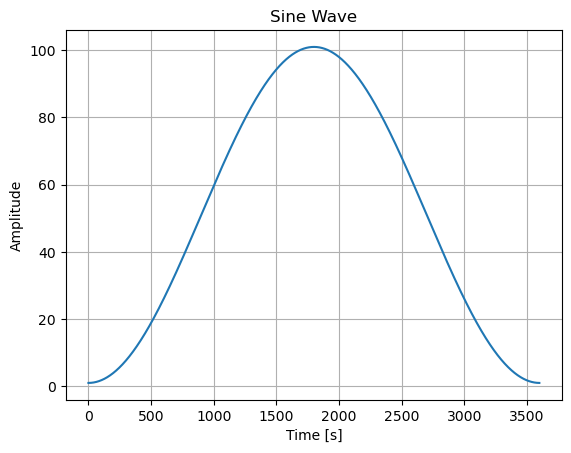

In [3]:

# Parameters for the sine wave
frequency = 1  # in Hertz, the desired natural frequency
amplitude = 50  # the amplitude of the sine wave
time_end = 2   # time in seconds until which the wave is generated
sample_rate = 1000  # sampling rate in samples per second

# Generate the time values
t = np.arange(0, 3600)

# Generate the sine wave
y = (amplitude * np.cos(2 * np.pi * frequency * t/3600 - np.pi) + 51)

# Plot the sine wave
plt.plot(t, y)
plt.title('Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [4]:


# Configs can be set in Configuration class directly or using helper utility
config.load_kube_config()

v1 = client.CoreV1Api()
auto_scale = client.AutoscalingV2Api()

In [10]:
count = 0
current_time = round(time.time())
start_time = current_time
prev_time = start_time + 2400
amplitude = 50
frequency = 1
print(f"time_from_start,request_per_seconds_avg,cpu_perc,replicas_no")
print_flg = True

with open('result2.csv', 'w') as f:
    f.write("time_from_start,request_per_seconds_avg,cpu_perc,replicas_no\n")

while True:
    current_time = round(time.time()) + 2400
    if current_time > prev_time:
        print_flg = True
    # sleep_time = abs(np.cos(2*np.pi*(current_seconds)/3600)) 
    sleep_time = 1/(amplitude * np.cos(2 * np.pi * frequency * ((current_time - start_time)%3600)/3600 - np.pi) + 51)
    try:
        time.sleep(sleep_time)
        requests.get("http://localhost.scorecard.com", stream=True)
    except Exception as e:
        pass
    count += 1
    if current_time - prev_time == 10 and print_flg:
        hpa = auto_scale.list_namespaced_horizontal_pod_autoscaler("default").items[0]
        current_replicas = hpa.status.current_replicas
        cpu_perc = hpa.status.current_metrics[0].resource.current.average_utilization
        print(f"{current_time - start_time},{1/sleep_time},{cpu_perc},{current_replicas}")
        with open('result2.csv', 'a') as f:
            f.write(f"{current_time - start_time},{1/sleep_time},{cpu_perc},{current_replicas}\n")
        prev_time = current_time
        print_flg = True

time_from_start,request_per_seconds_avg,cpu_perc,replicas_no
2410,75.24048101231688,48,15
2420,74.47357813929453,48,15
2430,73.69952498697734,48,15
2440,72.91855733945388,48,15
2450,72.130913087035,48,15
2460,71.33683215379004,48,15
2470,70.53655642446368,56,15
2480,69.73032967079561,56,15
2490,68.91839747726503,56,15
2500,68.10100716628342,56,15
2510,67.27840772285782,56,15
2520,66.45084971874738,56,15
2530,65.61858523613685,46,17
2540,64.78186779084999,46,17
2550,63.94095225512603,46,17
2560,63.09609477998338,46,17
2570,62.24755271719326,46,17
2580,61.39558454088798,46,17
2590,60.540449768827266,45,17
2600,59.68240888334651,45,17
2610,58.821723252011545,45,17
2620,57.95865504800328,45,17
2630,57.0934671702574,45,17
2640,56.22642316338271,45,17
2650,55.35778713738291,40,17
2660,54.48782368720627,40,17
2670,53.61679781214722,40,17
2680,52.74497483512508,40,17
2690,51.87262032186421,40,17
2700,51.0,40,17
2710,50.127379678135796,51,14
2720,49.25502516487493,51,14
2730,48.383202187852795,

KeyboardInterrupt: 

In [1]:
import pandas as pd

In [2]:
result_df = pd.read_csv("result2.csv")

In [3]:
result_df["time_from_start"] = result_df["time_from_start"] - 3600

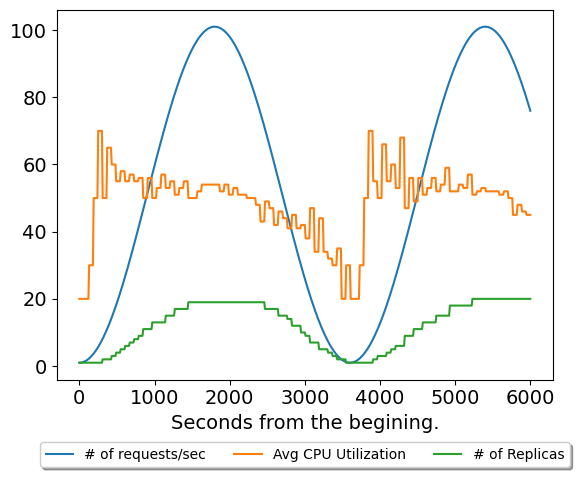

In [14]:
fig, ax = plt.subplots()
result_df.plot(x="time_from_start", ax=ax)
ax.legend(["# of requests/sec", "Avg CPU Utilization", "# of Replicas"], loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
plt.xlabel("Passed seconds", fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()